In [50]:
import pandas as pd
import matplotlib.pyplot as plt
# airports_df = pd.read_csv('backend/data/emission_definition/airports_information.csv')
erj145_df = pd.read_csv('backend/data/emission_definition/erj145_consumption_info.csv')

In [ ]:
# erj145_df["city_arr"], erj145_df["city_dep"] = zip(*erj145_df["City-pair"].str.split("-", n=1))
# for col in ['city_arr', 'city_dep']:
#     erj145_df = erj145_df.merge(
#         airports_df[['IATA', 'GeoPointLat', 'GeoPointLong']],
#         left_on=col, right_on='IATA', how='left'
#     ).rename(columns={'GeoPointLat': f'lat_{col}', 'GeoPointLong': f'lon_{col}'}).drop(columns=['IATA'])

In [ ]:
def nm_to_km(nm: float) -> float:
    """
    Convert nautical miles (nm) to kilometers (km).
    
    1 nautical mile = 1.852 kilometers
    """
    return nm * 1.852


def usg_to_kg(usg: float) -> float:
    """
    Convert U.S. gallons (USG) to kilograms (kg).
    
    1 U.S. gallon = 3.78541 kg (https://mye6b.com/Fuel/)
    """
    return usg * 2.95

def kg_fuel_to_kgCO2(kg_fuel: float) -> float:
    """
    Convert kilograms of fuel to kilograms of CO2.
    
    1 kg of fuel = 3.16 kg of CO2 (https://www.carbonindependent.org/files/B851vs2.4.pdf, page 22)
    """
    return kg_fuel * 3.16

In [67]:
erj145_df["ESAD_distance_km"] = nm_to_km(erj145_df["ESAD_nm"])
erj145_df["Fuel_burn_kg"] = usg_to_kg(erj145_df["Fuel_burn_USG"])
erj145_df["co2_emissions_kg"] = kg_fuel_to_kgCO2(erj145_df["Fuel_burn_kg"])

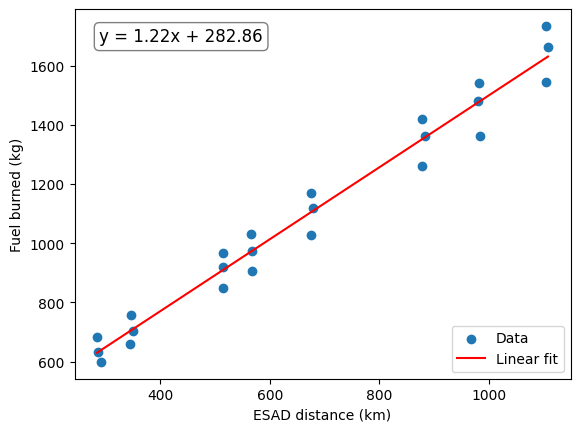

The slope of the linear regression is 1.2174
The intercept of the linear regression is 282.8615


In [68]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data
X = erj145_df["ESAD_distance_km"].values.reshape(-1, 1)
y = erj145_df["Fuel_burn_kg"].values

# Fit linear regression
reg = LinearRegression()
reg.fit(X, y)

# Predict values for plotting
x_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_fit = reg.predict(x_fit)

# Get regression coefficients
slope = reg.coef_[0]
intercept = reg.intercept_

# Display the regression equation on the plot
equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.scatter(erj145_df["ESAD_distance_km"], erj145_df["Fuel_burn_kg"], label="Data")
plt.plot(x_fit, y_fit, color="red", label="Linear fit")
plt.xlabel("ESAD distance (km)")
plt.ylabel("Fuel burned (kg)")
plt.legend()
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.5))
plt.show()
print(f"The slope of the linear regression is {slope:.4f}")
print(f"The intercept of the linear regression is {intercept:.4f}")